In [1]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END

## Reducers
from typing import Annotated
from langgraph.graph.message import add_messages

In [6]:
class State(TypedDict):
    messages:Annotated[list,add_messages]

In [7]:
import os
from dotenv import load_dotenv
load_dotenv()

os.environ["OPENAI_API_KEY"]=os.getenv("OPENAI_API_KEY")

In [8]:
from langchain_openai import ChatOpenAI
llm=ChatOpenAI(model='gpt-4.1')
llm.invoke("Hello")

AIMessage(content='Hello! How can I help you today? 😊', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 8, 'total_tokens': 18, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-2025-04-14', 'system_fingerprint': 'fp_799e4ca3f1', 'id': 'chatcmpl-BnmKDitggL8eDIvHRm92OnmflR0hh', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--79572f4d-9e8c-41e5-a169-619ae0e3b71f-0', usage_metadata={'input_tokens': 8, 'output_tokens': 10, 'total_tokens': 18, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [9]:
from langgraph.checkpoint.memory import MemorySaver
Memory=MemorySaver()

def superbot(state:State):
    return {"messages":[llm.invoke(state['messages'])]}

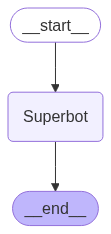

In [10]:
graph = StateGraph(State)

graph.add_node("Superbot",superbot)

graph.add_edge(START,"Superbot")
graph.add_edge("Superbot",END)

graph_builder=graph.compile(checkpointer=Memory)

from IPython.display import Image, display
display(Image(graph_builder.get_graph().draw_mermaid_png()))


In [11]:
config = {"configurable":{"thread_id":"1"}}
graph_builder.invoke({'messages':"Hi, My name is Ram"},config)

{'messages': [HumanMessage(content='Hi, My name is Ram', additional_kwargs={}, response_metadata={}, id='5db68a13-b831-420b-bf7c-2390d991089d'),
  AIMessage(content='Hello Ram! Nice to meet you. How can I help you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 13, 'total_tokens': 28, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-2025-04-14', 'system_fingerprint': 'fp_51e1070cf2', 'id': 'chatcmpl-BnmPzrsYqTaK1adEllALtvlsFPXQ3', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--29d345f9-4d33-4b42-bf96-20231524bcd0-0', usage_metadata={'input_tokens': 13, 'output_tokens': 15, 'total_tokens': 28, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})]}

In [12]:
config={"configurable":{"thread_id":"2"}}
for chunk in graph_builder.stream({'messages':"Hi, my name is Sai"},config,stream_mode="updates"):
    print(chunk)

{'Superbot': {'messages': [AIMessage(content='Hi Sai! Nice to meet you. How can I help you today? 😊', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 16, 'prompt_tokens': 13, 'total_tokens': 29, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-2025-04-14', 'system_fingerprint': 'fp_51e1070cf2', 'id': 'chatcmpl-BnmSqD4c2KbekKDnHqp5ur58PfTNu', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--26cb85e9-1795-49c4-8845-867c13642a45-0', usage_metadata={'input_tokens': 13, 'output_tokens': 16, 'total_tokens': 29, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})]}}


In [13]:
for chunk in graph_builder.stream({'messages':"I am AI Engineer"},config,stream_mode="values"):
    print(chunk)

{'messages': [HumanMessage(content='Hi, my name is Sai', additional_kwargs={}, response_metadata={}, id='f2868bd2-daa8-4ffc-a329-aac8de11d115'), AIMessage(content='Hi Sai! Nice to meet you. How can I help you today? 😊', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 16, 'prompt_tokens': 13, 'total_tokens': 29, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-2025-04-14', 'system_fingerprint': 'fp_51e1070cf2', 'id': 'chatcmpl-BnmSqD4c2KbekKDnHqp5ur58PfTNu', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--26cb85e9-1795-49c4-8845-867c13642a45-0', usage_metadata={'input_tokens': 13, 'output_tokens': 16, 'total_tokens': 29, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}), Human

In [14]:
config = {"configurable":{"thread_id":"3"}}

async for event in graph_builder.astream_events({"messages":["Hi, My name is Sai, AI Engineer"]},config,version="v2"):
    print(event)

{'event': 'on_chain_start', 'data': {'input': {'messages': ['Hi, My name is Sai, AI Engineer']}}, 'name': 'LangGraph', 'tags': [], 'run_id': '537f2287-4e89-4fdb-b1ec-75c2a5a2ffab', 'metadata': {'thread_id': '3'}, 'parent_ids': []}
{'event': 'on_chain_start', 'data': {'input': {'messages': [HumanMessage(content='Hi, My name is Sai, AI Engineer', additional_kwargs={}, response_metadata={}, id='eed10781-bc6f-40eb-840c-54466e4f6d7f')]}}, 'name': 'Superbot', 'tags': ['graph:step:1'], 'run_id': '15ecd6a9-44a5-459c-a030-39f23f4faeca', 'metadata': {'thread_id': '3', 'langgraph_step': 1, 'langgraph_node': 'Superbot', 'langgraph_triggers': ('branch:to:Superbot',), 'langgraph_path': ('__pregel_pull', 'Superbot'), 'langgraph_checkpoint_ns': 'Superbot:85227ea6-4fff-0ebf-f275-f48a873c6995'}, 'parent_ids': ['537f2287-4e89-4fdb-b1ec-75c2a5a2ffab']}
{'event': 'on_chat_model_start', 'data': {'input': {'messages': [[HumanMessage(content='Hi, My name is Sai, AI Engineer', additional_kwargs={}, response_me